# TP logistic regression
Diane Lingrand (diane.lingrand@univ-cotedazur)

Septembre 2021

Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression


In [1]:
#necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score

## dataset: Iris

In [2]:
# loading the dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [4]:
print("train: ", y_train)
print("test: ", y_test)

train:  [2 1 1 0 1 2 0 1 0 0 1 1 2 0 1 0 0 2 0 2 2 0 2 2 0 0 0 2 2 0 1 2 0 1 0 0 1
 2 0 2 0 0 0 0 1 1 2 0 0 0 0 1 1 1 1 1 2 2 2 1 2 1 1 2 1 2 2 0 2 2 1 1 1 0
 2 0 0 0 1 0 1 1 2 2 1 1 2 0 1 2]
test:  [2 2 0 1 0 0 1 2 1 0 1 1 2 0 0 2 1 2 1 0 0 0 0 0 2 1 0 0 2 0 0 2 2 2 1 2 1
 2 1 1 1 1 1 2 2 0 2 0 0 2 1 1 2 2 1 1 2 2 1 2]


### classification of only 2 classes

In [5]:
# we choose to remove class with label 2 (Iris Virginica)
X_trainBinaire = X_train[y_train!=2]
y_trainBinaire = y_train[y_train!=2]
X_testBinaire = X_test[y_test!=2]
y_testBinaire = y_test[y_test!=2]


In [6]:
# verification that we have binary labels for only 2 classes
print("train: ", y_trainBinaire)
print("test: ", y_testBinaire)

train:  [1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1]
test:  [0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1
 1]


In [7]:
#default constructor
myRegLogBin = LogisticRegression()
#learning
time_start = time.perf_counter()
myRegLogBin.fit(X_trainBinaire,y_trainBinaire)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))

learning done in 0.09 seconds


F1 score :  1.0


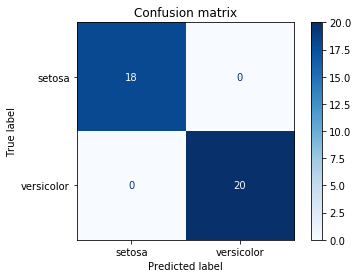

In [9]:
#test performances
y_predBinaire = myRegLogBin.predict(X_testBinaire)

disp = plot_confusion_matrix(myRegLogBin, X_testBinaire, y_testBinaire,
                                 display_labels=list(iris.target_names)[0:2],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predBinaire,y_testBinaire))

### classification of all classes

In [11]:
#default constructor
myRegLog = LogisticRegression(max_iter=200)
#learning
time_start = time.perf_counter()
myRegLog.fit(X_train,y_train)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))

learning done in 0.04 seconds


F1 score :  [1.         0.9        0.90909091]


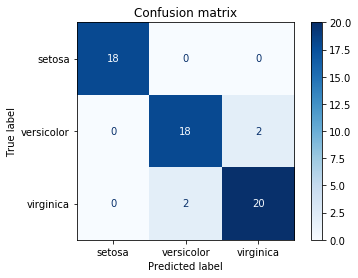

In [12]:
#test performances
y_pred = myRegLog.predict(X_test)

disp = plot_confusion_matrix(myRegLog, X_test, y_test,
                                 display_labels=list(iris.target_names),
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_pred,y_test,average=None))

## dataset: MNIST

In [13]:
#necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score

In [14]:
# reading the dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

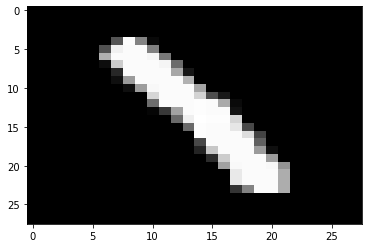

1


In [17]:
#display one of the pictures (the 11th in this code)
import matplotlib.pyplot as plt
i = 134#index of the image: change it in order to display other images
plt.imshow(x_train[i],aspect="auto",cmap='gray')
plt.show()
print(y_train[i])

In [19]:
print(x_train.shape)

(60000, 28, 28)


In [18]:
# case of binary classification: we choose 4 and 8 / coats and bags

# you can change the classes
class1 = 4 #negative class '4' ('coats')
class2 = 8 #positive class '8'('bags')
nameClass1 = '4'
nameClass2 = '8'
mesClassesTrain = (y_train==class1)|(y_train==class2)
mesClassesTest = (y_test==class1)|(y_test==class2)

## TRAIN
x_trainBinaire = np.array(x_train[mesClassesTrain,:])
y_trainBinaire = np.array((y_train[mesClassesTrain]-class1)/(class2-class1))

## TEST
x_testBinaire = np.array(x_test[mesClassesTest,:])
y_testBinaire = np.array((y_test[mesClassesTest]-class1)/(class2-class1))

In [20]:
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = x_trainBinaire.shape[0]
x_trainBinaireLin = x_trainBinaire.reshape(n,-1)
#test
n = x_testBinaire.shape[0]
x_testBinaireLin = x_testBinaire.reshape(n,-1)

In [25]:
#default constructor
myRegLog = LogisticRegression() #max_iter=200)
#learning
time_start = time.perf_counter()
myRegLog.fit(x_trainBinaireLin,y_trainBinaire)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))

learning done in 2.22 seconds


/home/lingrand/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
print(x_trainBinaireLin.shape)

(11693, 784)


You may read an error message. What does it mean? However, it is possible to measure the performance of the learned classification method.

F1 score :  0.9927760577915377


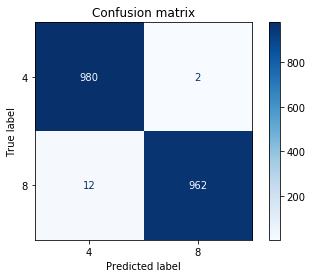

In [24]:
y_predBinaireTest = myRegLog.predict(x_testBinaireLin)

disp = plot_confusion_matrix(myRegLog, x_testBinaireLin, y_testBinaire,
                                 display_labels=[nameClass1,nameClass2],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predBinaireTest,y_testBinaire))

The logistic regression has been build with default parameters. Follow the recommandation and try different hints:
- algorithm terminaison: max number of iterations, ....
- data preprocessing: standardisation YES
- solver (liblinear, sag, saga, ...)
- regularisation

Did you get better results ? Did some converge faster ?

## The whole dataset with the 10 classes

In [ ]:
# your turn!
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = x_train.shape[0]
x_trainLin = x_train.reshape(n,-1)
#test
n = x_test.shape[0]
x_testLin = x_test.reshape(n,-1)

In [ ]:
#default constructor
myRegLog = LogisticRegression(solver='saga',max_iter=400)
#learning
time_start = time.perf_counter()
myRegLog.fit(x_trainLin,y_train)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))

In [ ]:
y_predTest = myRegLog.predict(x_testLin)

disp = plot_confusion_matrix(myRegLog, x_testLin, y_test,
                                 display_labels=['0','1','2','3','4','5','6', '7', '8', '9'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predTest,y_test, average=None))

## Do you obtain the same results with FMNIST ? (fashion MNIST)

In [ ]:
# your turn!
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()